# Visualisation to explore the relationship between supply, demand and price

In [12]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [8]:
gas = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/raw/fuel/supply_demand/gas_demand_cost.csv')
gas_drop_na = gas.dropna()
gas_drop_na

,year,demand,price
24,1993,81848.0000,0.009919
25,1994,117606.0000,0.009254
26,1995,154393.0000,0.008706
27,1996,201969.0000,0.008170
28,1997,251822.0000,0.008357
29,1998,267733.0000,0.008382
30,1999,315493.0000,0.007772
31,2000,324563.0000,0.007388
32,2001,312939.0000,0.008177
33,2002,329847.0000,0.007340


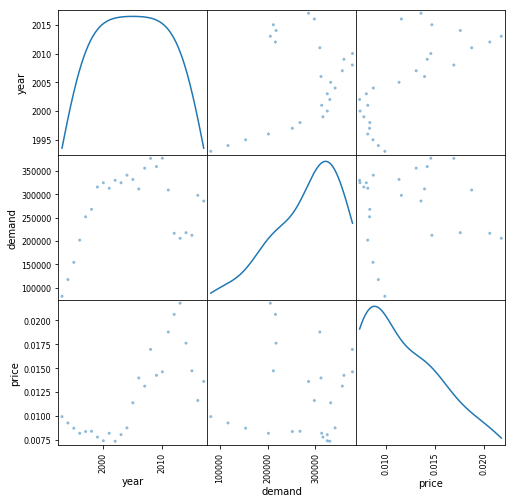

In [28]:
scatter_matrix(gas_drop_na, figsize = (8, 8), diagonal = 'kde')
plt.show()

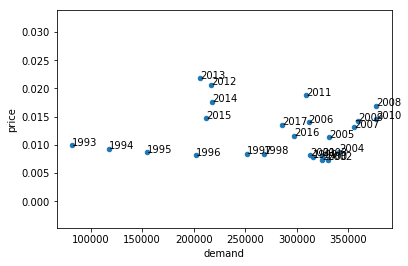

In [40]:
ax = gas_drop_na.plot.scatter(x='demand', y='price')
for i, txt in enumerate(gas_drop_na.year):
    ax.annotate(txt, (gas_drop_na.demand.iat[i],gas_drop_na.price.iat[i]))
plt.show()

# World Gas Demand

In [72]:
world_gas = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/raw/fuel/supply_demand/gas_demand_cost_europe.csv')
world_gas = world_gas[world_gas.year!='Source']
world_gas

,year,europe_demand,CIS_demand,northamerica_demand,asia_demand,africa_demand,middle_east,pacific_demand,latam_demand,uk_price
1,1996,469,704,707,226,46,137,26,107,1.866
2,1997,466,716,729,246,48,148,26,115,1.957
3,1998,477,679,713,255,50,157,27,125,1.865
4,1999,494,651,722,274,55,168,28,126,1.579
5,2000,508,567,753,286,57,174,29,135,2.711
6,2001,523,575,717,302,64,187,30,137,3.175
7,2002,524,580,743,321,69,202,32,146,2.373
8,2003,547,608,726,345,76,215,31,159,3.332
9,2004,561,617,726,370,79,236,32,172,4.457
10,2005,574,624,722,392,89,256,31,177,7.383


In [71]:
europe_gas = world_gas[['year','europe_demand','uk_price']]
scatter_matrix(europe_gas, figsize = (8, 8), diagonal = 'kde')
plt.show()

ValueError: num must be 1 <= num <= 0, not 1

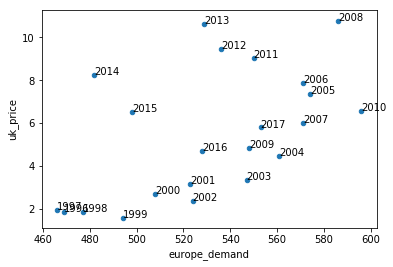

In [52]:
ax = europe_gas.plot.scatter(x='europe_demand', y='uk_price')
for i, txt in enumerate(europe_gas.year):
    ax.annotate(txt, (europe_gas.europe_demand.iat[i],europe_gas.uk_price.iat[i]))
plt.show()

# World Gas Demand vs UK Gas Prices

In [57]:
world_gas.head()

,year,europe_demand,CIS_demand,northamerica_demand,asia_demand,africa_demand,middle_east,pacific_demand,latam_demand,uk_price,total_demand
0,1996,469,704,707,226,46,137,26,107,1.866,2422
1,1997,466,716,729,246,48,148,26,115,1.957,2494
2,1998,477,679,713,255,50,157,27,125,1.865,2483
3,1999,494,651,722,274,55,168,28,126,1.579,2518
4,2000,508,567,753,286,57,174,29,135,2.711,2509


In [55]:
world_gas['total_demand'] = world_gas[['europe_demand','CIS_demand','northamerica_demand','asia_demand','africa_demand','middle_east','pacific_demand','latam_demand']].sum(axis=1)
world_gas



,year,europe_demand,CIS_demand,northamerica_demand,asia_demand,africa_demand,middle_east,pacific_demand,latam_demand,uk_price,total_demand
0,1996,469,704,707,226,46,137,26,107,1.866,2422
1,1997,466,716,729,246,48,148,26,115,1.957,2494
2,1998,477,679,713,255,50,157,27,125,1.865,2483
3,1999,494,651,722,274,55,168,28,126,1.579,2518
4,2000,508,567,753,286,57,174,29,135,2.711,2509
5,2001,523,575,717,302,64,187,30,137,3.175,2535
6,2002,524,580,743,321,69,202,32,146,2.373,2617
7,2003,547,608,726,345,76,215,31,159,3.332,2707
8,2004,561,617,726,370,79,236,32,172,4.457,2793
9,2005,574,624,722,392,89,256,31,177,7.383,2865


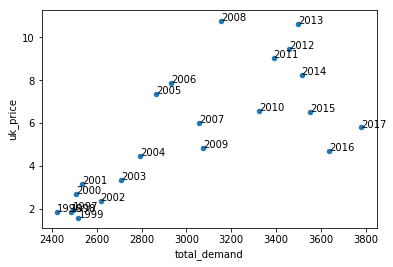

In [56]:
ax = world_gas.plot.scatter(x='total_demand', y='uk_price')
for i, txt in enumerate(world_gas.year):
    ax.annotate(txt, (world_gas.total_demand.iat[i],world_gas.uk_price.iat[i]))
plt.show()